# Logistic Regression

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from preprocessing.hog import Flatten
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [44]:
#Load Metadata
hog_metadata_path = 'data/hog/metadata.csv'
hog_metadata = pd.read_csv(hog_metadata_path, index_col=0)
hog_metadata.channels = hog_metadata.channels.astype(str)
hog_metadata

,channels,type,data_path,label_path
0,"[1, 2, 3]",dev,data/hog/dev/hog_0_1_2.npy,data/hog/dev/labels.npy
1,"[6, 7, 8]",dev,data/hog/dev/hog_5_6_7.npy,data/hog/dev/labels.npy
2,"[11, 12, 13]",dev,data/hog/dev/hog_10_11_12.npy,data/hog/dev/labels.npy
3,"[1, 2, 3]",test,data/hog/test/hog_0_1_2.npy,data/hog/test/labels.npy
4,"[6, 7, 8]",test,data/hog/test/hog_5_6_7.npy,data/hog/test/labels.npy
5,"[11, 12, 13]",test,data/hog/test/hog_10_11_12.npy,data/hog/test/labels.npy
6,"[1, 2, 3]",train,data/hog/train/hog_0_1_2.npy,data/hog/train/labels.npy
7,"[6, 7, 8]",train,data/hog/train/hog_5_6_7.npy,data/hog/train/labels.npy
8,"[11, 12, 13]",train,data/hog/train/hog_10_11_12.npy,data/hog/train/labels.npy


## 1. Channels RGB

#### Training set

In [7]:
X_train = np.load('data/hog/train/hog_0_1_2.npy')
y_train = np.load('data/hog/train/labels.npy')

#### Test set

In [28]:
X_test = np.load('data/hog/test/hog_0_1_2.npy')
y_test = np.load('data/hog/test/labels.npy')

#### Pipeline

In [69]:
from sklearn.preprocessing import StandardScaler

In [75]:
pipeline = Pipeline([('flatten', Flatten()),('Standardize',StandardScaler()),('lr', LogisticRegression(fit_intercept = True,max_iter = 200,penalty = "l2"))])

#### Training, Test and Visualization of Scores

In [76]:
confusion_matrices = {}
for channel in hog_metadata.channels.unique():
    train_metadata = hog_metadata[(hog_metadata.type == 'train') & (hog_metadata.channels == channel)]
    train = np.load(train_metadata.data_path.values[0])
    train_label = np.load(train_metadata.label_path.values[0])

    test_metadata = hog_metadata[(hog_metadata.type == 'test') & (hog_metadata.channels == channel)]
    test = np.load(f'{test_metadata.data_path.values[0]}')
    test_label = np.load(f'{test_metadata.label_path.values[0]}')
    
    pipeline.fit(train, train_label)
    
    confusion_mat = confusion_matrix(test_label, pipeline.predict(test))
    confusion_matrices[channel] = confusion_mat

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

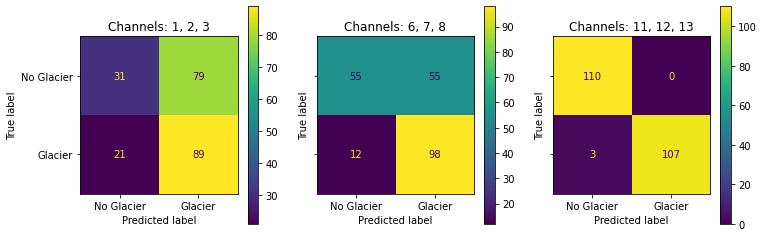

In [77]:
display_labels = ['No Glacier', 'Glacier']

fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(12, 4))

axes[0].set_title("Channels: 1, 2, 3")
axes[1].set_title("Channels: 6, 7, 8")
axes[2].set_title("Channels: 11, 12, 13")

ConfusionMatrixDisplay(confusion_matrices['[1, 2, 3]'], display_labels=display_labels).plot(ax=axes[0])
ConfusionMatrixDisplay(confusion_matrices['[6, 7, 8]'], display_labels=display_labels).plot(ax=axes[1])
ConfusionMatrixDisplay(confusion_matrices['[11, 12, 13]'], display_labels=display_labels).plot(ax=axes[2]);